<a href="https://colab.research.google.com/github/edwinmahendra/Skripsi/blob/main/%5BSkripsi%5D_Pre_Processing_%26_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setup and Installation Package**

**Cek Versi Python**


Pertama, mari kita cek versi Python yang sedang digunakan. Versi Python sangat penting karena beberapa package atau library mungkin membutuhkan versi Python tertentu.

In [ ]:
import platform
print(platform.python_version())

3.10.12


**Import Library**

Kemudian, kita akan mengimpor library yang diperlukan untuk proyek kita. Ini termasuk library untuk manipulasi data, visualisasi, machine learning, dan operasi file dan sistem.

In [ ]:
!pip install tensorflow

In [ ]:
import os
import shutil
import zipfile
import pathlib
import random
import cv2
import numpy as np
import hashlib
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import matplotlib.image as mpimg
from tensorflow import keras

from sklearn.metrics import confusion_matrix, classification_report
from google.colab import drive
from tensorflow.keras.utils import plot_model

print('setup successful')

setup successful


**Cek Versi Library yang Digunakan**

Untuk memastikan kompatibilitas dan reproduktivitas, penting untuk mengetahui versi dari library yang kita gunakan.

In [ ]:
print(f'Tensorflow version: {tf.__version__}')
print(f'OpenCV version: {cv2.__version__}')
print(f'Numpy version: {np.__version__}')

Tensorflow version: 2.15.0
OpenCV version: 4.8.0
Numpy version: 1.25.2


In [ ]:
library_versions = {
    "os": "Built-in, version not applicable",
    "shutil": "Built-in, version not applicable",
    "zipfile": "Built-in, version not applicable",
    "pathlib": "Built-in, version not applicable",
    "random": "Built-in, version not applicable",
    "cv2 (OpenCV)": cv2.__version__,
    "numpy": np.__version__,
    "hashlib": "Built-in, version not applicable",
    "PIL (Pillow)": Image.__version__,
    "pandas": pd.__version__,
    "matplotlib": plt.matplotlib.__version__,
    "seaborn": sns.__version__,
    "matplotlib.image": "Part of matplotlib, version: " + plt.matplotlib.__version__
}

library_versions

{'os': 'Built-in, version not applicable',
 'shutil': 'Built-in, version not applicable',
 'zipfile': 'Built-in, version not applicable',
 'pathlib': 'Built-in, version not applicable',
 'random': 'Built-in, version not applicable',
 'cv2 (OpenCV)': '4.8.0',
 'numpy': '1.25.2',
 'hashlib': 'Built-in, version not applicable',
 'PIL (Pillow)': '9.4.0',
 'pandas': '1.5.3',
 'matplotlib': '3.7.1',
 'seaborn': '0.13.1',
 'matplotlib.image': 'Part of matplotlib, version: 3.7.1'}

In [ ]:
import sys

# Print the version of Python
print("Python version:", sys.version)

Python version: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


**Instalasi Kaggle CLI**

Instalasi Kaggle CLI diperlukan untuk mengunduh dataset dari Kaggle secara langsung dari notebook.

In [ ]:
! pip install -q kaggle

## **Mount File from Drive**

In [ ]:
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Kaggle/kaggle.json'

Mounted at /content/drive


**Kaggle API**

Setup ini berguna agar dapat menggunakan API Kagle untuk mendownload dataset

In [ ]:
os.makedirs('/root/.kaggle', exist_ok=True)

shutil.copy(path, '/root/.kaggle/kaggle.json')

os.chmod('/root/.kaggle/kaggle.json', 600)

print('Kaggle API credentials set up.')

Kaggle API credentials set up.


## **Dataset Download**

In [ ]:
! kaggle datasets download deadskull7/fer2013

 84% 81.0M/96.6M [00:00<00:00, 153MB/s]
100% 96.6M/96.6M [00:00<00:00, 159MB/s]


In [ ]:
! kaggle datasets download shawon10/ckplus

  0% 0.00/3.63M [00:00<?, ?B/s]
100% 3.63M/3.63M [00:00<00:00, 208MB/s]


## **Unzip Dataset**

In [ ]:
! unzip /content/fer2013.zip

Archive:  /content/fer2013.zip
  inflating: fer2013.csv             


In [ ]:
! unzip /content/ckplus.zip

Archive:  /content/ckplus.zip
  inflating: CK+48/anger/S010_004_00000017.png  
  inflating: CK+48/anger/S010_004_00000018.png  
  inflating: CK+48/anger/S010_004_00000019.png  
  inflating: CK+48/anger/S011_004_00000019.png  
  inflating: CK+48/anger/S011_004_00000020.png  
  inflating: CK+48/anger/S011_004_00000021.png  
  inflating: CK+48/anger/S014_003_00000028.png  
  inflating: CK+48/anger/S014_003_00000029.png  
  inflating: CK+48/anger/S014_003_00000030.png  
  inflating: CK+48/anger/S022_005_00000030.png  
  inflating: CK+48/anger/S022_005_00000031.png  
  inflating: CK+48/anger/S022_005_00000032.png  
  inflating: CK+48/anger/S026_003_00000013.png  
  inflating: CK+48/anger/S026_003_00000014.png  
  inflating: CK+48/anger/S026_003_00000015.png  
  inflating: CK+48/anger/S028_001_00000022.png  
  inflating: CK+48/anger/S028_001_00000023.png  
  inflating: CK+48/anger/S028_001_00000024.png  
  inflating: CK+48/anger/S029_001_00000017.png  
  inflating: CK+48/anger/S029_001_00000

Setelah menyelesaikan langkah-langkah di atas, kita akan memiliki notebook Jupyter (.ipynb) yang rapi dengan dokumentasi mengenai setup dan instalasi library yang diperlukan untuk proyek.

In [ ]:
print('Setup was successful')

Setup was successful


# **Pre Processing Data**

## **Dataset FER2013**

In [ ]:
df = pd.read_csv('./fer2013.csv')

df.head(5),df.shape

(   emotion                                             pixels     Usage
 0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
 1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
 2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
 3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
 4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training,
 (35887, 3))

In [ ]:
df_no_usage = df.drop(columns=['Usage'])

df_no_usage.head(5),df_no_usage.shape

(   emotion                                             pixels
 0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
 1        0  151 150 147 155 148 133 111 140 170 174 182 15...
 2        2  231 212 156 164 174 138 161 173 182 200 106 38...
 3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
 4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,
 (35887, 2))

In [ ]:
df_no_duplicates = df_no_usage.drop_duplicates(subset=['pixels'], keep='first')

In [ ]:
filtered_emotions = {
    0: "Angry",
    3: "Happy",
    4: "Sad",
    6: "Neutral"
}

In [ ]:
df_filtered = df_no_duplicates[df_no_duplicates['emotion'].isin(filtered_emotions.keys())].copy()

df_filtered.loc[:, 'emotion'] = df_filtered['emotion'].map(filtered_emotions)


In [ ]:
df_filtered.to_csv('./fer2013_fix.csv', index=False)

In [ ]:
df_fix = pd.read_csv('./fer2013_fix.csv')

df_fix.head(5),df_fix.shape

(   emotion                                             pixels
 0    Angry  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
 1    Angry  151 150 147 155 148 133 111 140 170 174 182 15...
 2      Sad  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
 3  Neutral  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
 4      Sad  20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,
 (25497, 2))

In [ ]:
images_dir = './images'
if not os.path.exists(images_dir):
    os.makedirs(images_dir)

In [ ]:
def save_image_with_label_dir(row, base_dir):
    emotion_dir = os.path.join(base_dir, row['emotion'])
    if not os.path.exists(emotion_dir):
        os.makedirs(emotion_dir)

    pixels = np.array([int(pixel) for pixel in row['pixels'].split()]).reshape(48, 48)
    image = Image.fromarray(pixels.astype('uint8'), 'L')
    image_file_name = f"{row['emotion'].lower()}_{row.name}.png"
    image_path = os.path.join(emotion_dir, image_file_name)
    image.save(image_path)

df_fix.apply(lambda row: save_image_with_label_dir(row, images_dir), axis=1)
print("Images have been saved into labeled directories successfully.")

Images have been saved into labeled directories successfully.


In [ ]:
emotion_distribution = df_fix['emotion'].value_counts()

print(emotion_distribution)

Happy      8796
Neutral    6052
Sad        5922
Angry      4727
Name: emotion, dtype: int64


### **Zip the files**

In [ ]:
directory_to_zip = './images'
output_filename = 'fer2013_skripsi'

shutil.make_archive(output_filename, 'zip', directory_to_zip)

print(f"The directory {directory_to_zip} has been successfully zipped into {output_filename}.zip")

The directory ./images has been successfully zipped into fer2013_skripsi.zip


## **Dataset CK+**

In [ ]:
ckplus_base_path = '/content/CK+48'

In [ ]:
emotions_ck = ['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']

In [ ]:
def file_hash(filepath):
    with open(filepath, 'rb') as f:
        file_hash = hashlib.md5()
        while chunk := f.read(4096):
            file_hash.update(chunk)
    return file_hash.hexdigest()

def remove_duplicate_images(directory):
    hashes = {}
    files_removed = 0
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        img_hash = file_hash(filepath)
        if img_hash in hashes:
            os.remove(filepath)
            files_removed += 1
        else:
            hashes[img_hash] = filename
    return files_removed

total_images_before = 0
total_images_after = 0

print("Checking and removing duplicates in each emotion category:")

for emotion in emotions_ck:
    emotion_dir = os.path.join(ckplus_base_path, emotion)
    initial_count = len(os.listdir(emotion_dir))
    total_images_before += initial_count

    files_removed = remove_duplicate_images(emotion_dir)

    final_count = initial_count - files_removed
    total_images_after += final_count

    print(f"{emotion.capitalize()}: {initial_count} initial images, {files_removed} duplicates removed, {final_count} final images")

print(f"\nTotal number of images before removal: {total_images_before}")
print(f"Total number of images after duplicate removal: {total_images_after}")

Checking and removing duplicates in each emotion category:
Anger: 135 initial images, 0 duplicates removed, 135 final images
Contempt: 54 initial images, 0 duplicates removed, 54 final images
Disgust: 177 initial images, 0 duplicates removed, 177 final images
Fear: 75 initial images, 0 duplicates removed, 75 final images
Happy: 207 initial images, 0 duplicates removed, 207 final images
Sadness: 84 initial images, 0 duplicates removed, 84 final images
Surprise: 249 initial images, 0 duplicates removed, 249 final images

Total number of images before removal: 981
Total number of images after duplicate removal: 981


In [ ]:
target_base_dir = 'ck_images'
if not os.path.exists(target_base_dir):
    os.makedirs(target_base_dir)

In [ ]:
emotion_mapping = {
    'happy': 'Happy',
    'sadness': 'Sad',
    'anger': 'Angry',
    'contempt': 'Neutral'
}

In [ ]:
for emotion in emotion_mapping.values():
    emotion_dir = os.path.join(target_base_dir, emotion)
    if not os.path.exists(emotion_dir):
        os.makedirs(emotion_dir)

def copy_images(source_dir, target_dir, emotion_label):
    for filename in os.listdir(source_dir):
        source_path = os.path.join(source_dir, filename)
        target_path = os.path.join(target_dir, f"{emotion_label.lower()}_{filename}")
        shutil.copy(source_path, target_path)

for ck_emotion, target_emotion in emotion_mapping.items():
    source_dir = os.path.join(ckplus_base_path, ck_emotion)
    target_dir = os.path.join(target_base_dir, target_emotion)
    copy_images(source_dir, target_dir, target_emotion)

print("Images have been copied to the target directories successfully.")

Images have been copied to the target directories successfully.


In [ ]:
directory_to_zip = './ck_images'
output_filename = 'ck_skripsi'

shutil.make_archive(output_filename, 'zip', directory_to_zip)

print(f"The directory {directory_to_zip} has been successfully zipped into {output_filename}.zip")

The directory ./ck_images has been successfully zipped into ck_skripsi.zip


In [ ]:
directory_to_zip = './ck_images'
output_filename = 'ck_skripsi'

shutil.make_archive(output_filename, 'zip', directory_to_zip)

print(f"The directory {directory_to_zip} has been successfully zipped into {output_filename}.zip")

The directory ./ck_images has been successfully zipped into ck_skripsi.zip


## **Dataset IMED**

In [ ]:
base_path_imed = '/content/drive/My Drive/data IMED'

In [ ]:
new_base_dir = '/content/data IMED_merged'

In [ ]:
labels_common = ['angry', 'disgust', 'fear', 'happy', 'sad']
labels_train_only = ['neutral', 'suprise']

all_labels = labels_common + labels_train_only

if not os.path.exists(new_base_dir):
    os.makedirs(new_base_dir)

for label in all_labels:
    label_dir = os.path.join(new_base_dir, label)
    if not os.path.exists(label_dir):
        os.makedirs(label_dir)

def copy_images(source_dir, target_dir):
    for filename in os.listdir(source_dir):
        source_path = os.path.join(source_dir, filename)
        target_path = os.path.join(target_dir, filename)
        if not os.path.exists(target_path):
            shutil.copy(source_path, target_path)

for label in labels_common:
    train_dir = os.path.join(base_path_imed, 'train', label)
    val_dir = os.path.join(base_path_imed, 'val', label)
    target_dir = os.path.join(new_base_dir, label)
    copy_images(train_dir, target_dir)
    copy_images(val_dir, target_dir)

for label in labels_train_only:
    train_dir = os.path.join(base_path_imed, 'train', label)
    target_dir = os.path.join(new_base_dir, label)
    copy_images(train_dir, target_dir)

print("Images have been successfully merged into the new directory structure.")

Images have been successfully merged into the new directory structure.


In [ ]:
emotion_mapping = {
    'happy': 'Happy',
    'sad': 'Sad',
    'angry': 'Angry',
    'neutral': 'Neutral'
}

for old_emotion, new_emotion in emotion_mapping.items():
    old_dir = os.path.join(new_base_dir, old_emotion)
    new_dir = os.path.join(new_base_dir, new_emotion)

    if os.path.exists(old_dir):
        if not os.path.exists(new_dir):
            os.rename(old_dir, new_dir)
        else:
            for filename in os.listdir(old_dir):
                shutil.move(os.path.join(old_dir, filename), new_dir)
            os.rmdir(old_dir)

for dir_name in os.listdir(new_base_dir):
    if dir_name.lower() not in emotion_mapping.values() and dir_name.lower() not in emotion_mapping.keys():
        shutil.rmtree(os.path.join(new_base_dir, dir_name))

print("Directories have been successfully renamed and non-mapped emotions have been removed.")

Directories have been successfully renamed and non-mapped emotions have been removed.


In [ ]:
no_face_detected_count = 0
could_not_read_image_count = 0
successfully_processed_count = 0

In [ ]:
haar_image_dir = '/content/haar_image_imed'

if not os.path.exists(haar_image_dir):
    os.makedirs(haar_image_dir)

### **Pre Processing HaarCascade - IMED**

In [ ]:
import cv2

face_cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(face_cascade_path)

def process_image(image_path, output_directory):
    global no_face_detected_count, could_not_read_image_count, successfully_processed_count

    img = cv2.imread(image_path)
    if img is None:
        could_not_read_image_count += 1
        os.remove(image_path)
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))
    if len(faces) == 0:
        no_face_detected_count += 1
        os.remove(image_path)
        return

    x, y, w, h = faces[0]
    face_crop = gray[y:y+h, x:x+w]
    resized_image = cv2.resize(face_crop, (48, 48), interpolation=cv2.INTER_AREA)

    file_name = os.path.basename(image_path)
    cv2.imwrite(os.path.join(output_directory, file_name), resized_image)
    successfully_processed_count += 1
    print(f"Processed image saved: {os.path.join(output_directory, file_name)}")

emotion_dirs = ['Happy', 'Sad', 'Angry', 'Neutral']

for emotion in emotion_dirs:
    emotion_dir = os.path.join(new_base_dir, emotion)
    haar_emotion_dir = os.path.join(haar_image_dir, emotion)

    if not os.path.exists(haar_emotion_dir):
        os.makedirs(haar_emotion_dir)

    for img_file in os.listdir(emotion_dir):
        img_path = os.path.join(emotion_dir, img_file)
        if os.path.isfile(img_path):
            process_image(img_path, haar_emotion_dir)
        else:
            print(f"Skipping directory: {img_path}")

print(f"Images could not be read: {could_not_read_image_count}")
print(f"Images with no face detected: {no_face_detected_count}")
print(f"Successfully processed images: {successfully_processed_count}")

Processed image saved: /content/haar_image_imed/Happy/Happy-Subject2 (51).jpg
Processed image saved: /content/haar_image_imed/Happy/Happy-Subject14 (7).jpg
Processed image saved: /content/haar_image_imed/Happy/Happy-Subject1 (90).jpg
Processed image saved: /content/haar_image_imed/Happy/Happy-Subject7 (77).jpg
Processed image saved: /content/haar_image_imed/Happy/Happy-Subject (74).jpg
Processed image saved: /content/haar_image_imed/Happy/Happy-Subject2 (24).jpg
Processed image saved: /content/haar_image_imed/Happy/Happy-Subject10 (48).jpg
Processed image saved: /content/haar_image_imed/Happy/Happy-Subject7 (66).jpg
Processed image saved: /content/haar_image_imed/Happy/Happy-Subject4 (32).jpg
Processed image saved: /content/haar_image_imed/Happy/Happy-Subject14 (11).jpg
Processed image saved: /content/haar_image_imed/Happy/Happy-Subject1 (102).jpg
Processed image saved: /content/haar_image_imed/Happy/Happy-Subject5 (23).jpg
Processed image saved: /content/haar_image_imed/Happy/Happy-Su

In [ ]:
print(f"Total images with no face detected: {no_face_detected_count}")
print(f"Total images that could not be read: {could_not_read_image_count}")
print(f"Total images successfully processed: {successfully_processed_count}")

Total images with no face detected: 9
Total images that could not be read: 0
Total images successfully processed: 4656


In [ ]:
directory_to_zip = './haar_image_imed'
output_filename = 'imed_skripsi'

shutil.make_archive(output_filename, 'zip', directory_to_zip)

print(f"The directory {directory_to_zip} has been successfully zipped into {output_filename}.zip")

The directory ./haar_image_imed has been successfully zipped into imed_skripsi.zip


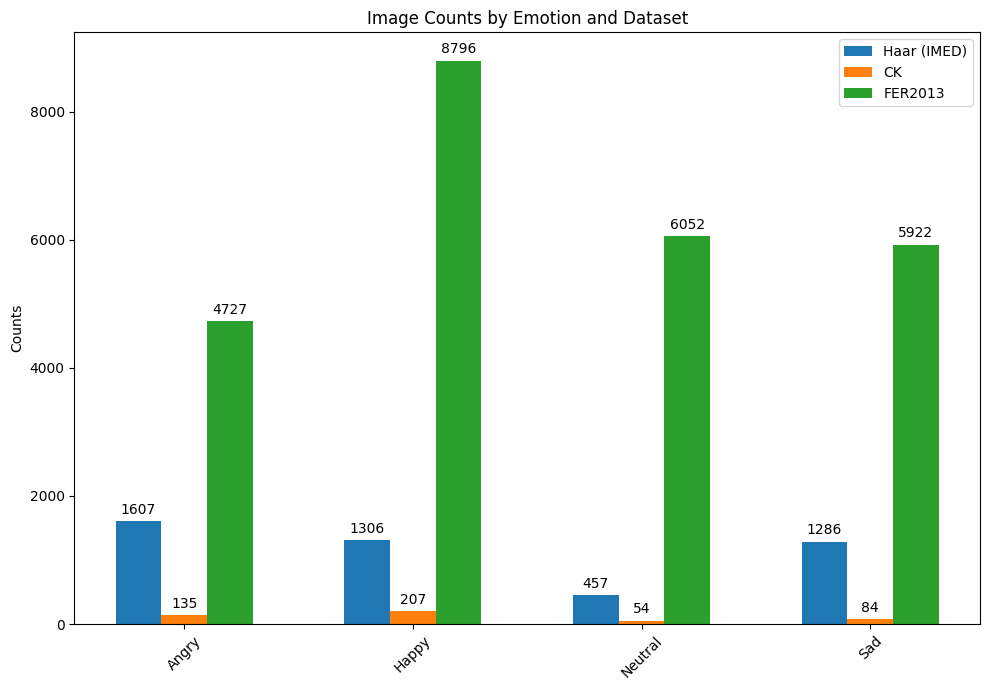

In [ ]:
directories = {
    "Haar (IMED)": "haar_image_imed",
    "CK": "ck_images",
    "FER2013": "images"
}

labels = ["Angry", "Happy", "Neutral", "Sad"]

counts = {key: {label: 0 for label in labels} for key in directories.keys()}

for dataset_name, dataset_path in directories.items():
    for label in labels:
        label_path = os.path.join(dataset_path, label)
        if os.path.exists(label_path):
            counts[dataset_name][label] = len([file for file in os.listdir(label_path) if os.path.isfile(os.path.join(label_path, file))])

fig, ax = plt.subplots(figsize=(10, 7))
width = 0.2
ind = range(len(labels))

for i, (dataset_name, dataset_counts) in enumerate(counts.items()):
    bars = ax.bar([x + width*i for x in ind], dataset_counts.values(), width, label=dataset_name)
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_ylabel('Counts')
ax.set_title('Image Counts by Emotion and Dataset')
ax.set_xticks([x + width*(len(counts)-1)/2 for x in range(len(labels))])
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
count_all = 0
for dataset_name, dataset_counts in counts.items():
    print(f"{dataset_name}:")
    for label, count in dataset_counts.items():
      count_all += count
      print(f"{label}: {count}")
    print("\n")

print(f"Total images: {count_all}")

Haar (IMED):
Angry: 1607
Happy: 1306
Neutral: 457
Sad: 1286


CK:
Angry: 135
Happy: 207
Neutral: 54
Sad: 84


FER2013:
Angry: 4727
Happy: 8796
Neutral: 6052
Sad: 5922


Total images: 30633


## **Set Minimum Count to Dataset**

In [ ]:
# def get_min_count_for_dataset(dataset_path, labels):
#     counts = []
#     for label in labels:
#         label_dir = os.path.join(dataset_path, label)
#         if os.path.exists(label_dir):
#             counts.append(len([img for img in os.listdir(label_dir) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]))
#     return min(counts) if counts else 0

# def sample_and_save_images(source_dir, target_dir, sample_size):
#     if not os.path.exists(target_dir):
#         os.makedirs(target_dir)

#     images = [img for img in os.listdir(source_dir) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
#     sampled_images = random.sample(images, min(len(images), sample_size))

#     for img in sampled_images:
#         shutil.copy(os.path.join(source_dir, img), os.path.join(target_dir, img))

# datasets = {
#     "Haar (IMED)": "/content/haar_image_imed",
#     "CK": "/content/ck_images",
#     "FER2013": "/content/images"
# }

# labels = ["Angry", "Happy", "Neutral", "Sad"]

# for dataset_name, dataset_path in datasets.items():
#     min_count = get_min_count_for_dataset(dataset_path, labels)
#     print(f"Balancing {dataset_name} with min count: {min_count}")

#     for label in labels:
#         source_dir = os.path.join(dataset_path, label)
#         target_dir = os.path.join(dataset_path + "_balanced", label)
#         sample_and_save_images(source_dir, target_dir, min_count)
# #randomseed

In [ ]:
dataset_dirs = {
    "Haar (IMED)": "/content/haar_image_imed",
    "CK": "/content/ck_images",
    "FER2013": "/content/images"
}

emotions = ["Angry", "Happy", "Neutral", "Sad"]

merged_dir = "/content/Dataset_Skripsi_1"

# Ensure the merged directory and its subdirectories exist
if not os.path.exists(merged_dir):
    os.makedirs(merged_dir)

for emotion in emotions:
    emotion_dir = os.path.join(merged_dir, emotion)
    if not os.path.exists(emotion_dir):
        os.makedirs(emotion_dir)

# Function to generate a unique file path to avoid overwrites
def generate_unique_file_path(destination_dir, original_file_name):
    base_name, extension = os.path.splitext(original_file_name)
    counter = 1
    new_file_name = original_file_name
    while os.path.exists(os.path.join(destination_dir, new_file_name)):
        new_file_name = f"{base_name}_{counter}{extension}"
        counter += 1
    return os.path.join(destination_dir, new_file_name)

# Iterate over the dataset directories and copy files
for dataset_name, dataset_path in dataset_dirs.items():
    total_count = 0  # Initialize a counter for the total number of files processed for the dataset
    print(f"Merging dataset: {dataset_name}")

    for emotion in emotions:
        source_emotion_dir = os.path.join(dataset_path, emotion)

        if os.path.exists(source_emotion_dir):
            files = os.listdir(source_emotion_dir)
            num_files = len(files)
            total_count += num_files  # Increment the total count by the number of files in the current emotion directory

            for file_name in files:
                source_file_path = os.path.join(source_emotion_dir, file_name)
                destination_file_path = generate_unique_file_path(os.path.join(merged_dir, emotion), file_name)

                # Copy the file to the new path
                shutil.copy2(source_file_path, destination_file_path)

    print(f"Finished merging {total_count} images from dataset: {dataset_name}")

print("Merging completed.")

Merging dataset: Haar (IMED)
Finished merging 4656 images from dataset: Haar (IMED)
Merging dataset: CK
Finished merging 480 images from dataset: CK
Merging dataset: FER2013
Finished merging 25497 images from dataset: FER2013
Merging completed.


In [ ]:
if not os.path.exists(merged_dir):
    print("The specified path does not exist.")
else:
    # Initialize a dictionary to hold the count of files per emotion
    file_counts = {}

    # Iterate over the directories within the target path
    for emotion in os.listdir(merged_dir):
        emotion_path = os.path.join(merged_dir, emotion)

        # Check if it's indeed a directory (to avoid counting any stray files)
        if os.path.isdir(emotion_path):
            # Count the number of files in this directory
            num_files = len(os.listdir(emotion_path))
            file_counts[emotion] = num_files

    # Display the counts
    for emotion, count in file_counts.items():
        print(f"{emotion}: {count} files")

Angry: 6469 files
Neutral: 6563 files
Sad: 7292 files
Happy: 10309 files


## **Creates a new directory for the merged and balanced dataset**

In [ ]:


# for emotion in emotions:
#     emotion_dir = os.path.join(merged_dir, emotion)
#     if not os.path.exists(emotion_dir):
#         os.makedirs(emotion_dir)

#     for dataset_name, dataset_path in dataset_dirs.items():
#         source_dir = os.path.join(dataset_path, emotion)
#         if os.path.exists(source_dir):
#             for img_file in os.listdir(source_dir):
#                 source_path = os.path.join(source_dir, img_file)
#                 target_path = os.path.join(emotion_dir, f"{dataset_name}_{img_file}")
#                 shutil.copy(source_path, target_path)

# min_count = float('inf')
# for emotion in emotions:
#     emotion_dir = os.path.join(merged_dir, emotion)
#     count = len(os.listdir(emotion_dir))
#     if count < min_count:
#         min_count = count

# for emotion in emotions:
#     emotion_dir = os.path.join(merged_dir, emotion)
#     all_images = os.listdir(emotion_dir)
#     if len(all_images) > min_count:
#         sampled_images = random.sample(all_images, min_count)
#         for img_file in all_images:
#             if img_file not in sampled_images:
#                 os.remove(os.path.join(emotion_dir, img_file))

# print("Proses penggabungan dan penyamarataan dataset selesai.")

# **Build a Model**

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (48, 48)

np.random.seed(123)
seed = np.random.randint(0,100)
print(f"Current seed : {seed}")

Current seed : 66


In [ ]:
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

## **Data Augmentasi**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    # fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
haar_dir = "/content/haar_image_imed"
ck_dir = "/content/ck_images"
fer_dir = "/content/images"

if not os.path.exists(haar_dir):
    print("The specified path does not exist.")
else:
    file_counts = {}

    for emotion in os.listdir(haar_dir):
        emotion_path = os.path.join(haar_dir, emotion)
        if os.path.isdir(emotion_path):
            num_files = len(os.listdir(emotion_path))
            file_counts[emotion] = num_files

    for emotion, count in file_counts.items():
        print(f"{emotion}: {count} files")

# if not os.path.exists(merged_dir):
#     print("The specified path does not exist.")
# else:
#     file_counts = {}

#     for emotion in os.listdir(merged_dir):
#         emotion_path = os.path.join(merged_dir, emotion)
#         if os.path.isdir(emotion_path):
#             num_files = len(os.listdir(emotion_path))
#             file_counts[emotion] = num_files

#     for emotion, count in file_counts.items():
#         print(f"{emotion}: {count} files")

Angry: 1607 files
Neutral: 457 files
Sad: 1286 files
Happy: 1306 files


## **Pembagian Data**

`.prefetch(buffer_size=tf.data.AUTOTUNE)`: Mengoptimalkan pengiriman data ke model dengan melakukan prefetching, yaitu mempersiapkan batch data berikutnya saat model sedang melatih, sehingga tidak ada waktu yang terbuang saat model menunggu data.

`tf.data.AUTOTUNE` digunakan untuk menentukan ukuran buffer secara otomatis berdasarkan kondisi sistem saat ini.


In [ ]:

# train_ds = train_datagen.flow_from_directory(
#     haar_dir,
#     subset="training",
#     seed=seed,
#     target_size=IMG_SIZE,
#     batch_size=BATCH_SIZE,
#     color_mode='grayscale'
# )

# val_ds = val_datagen.flow_from_directory(
#     haar_dir,
#     subset="validation",
#     seed=seed,
#     target_size=IMG_SIZE,
#     batch_size=BATCH_SIZE,
#     color_mode='grayscale'
# )

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    merged_dir,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='grayscale'
).map(preprocess).cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

val_ds = tf.keras.utils.image_dataset_from_directory(
    merged_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode='grayscale'
).map(preprocess).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# train_ds = tf.keras.utils.image_dataset_from_directory(
#     merged_dir,
#     validation_split=0.2,
#     subset="training",
#     seed=seed,
#     image_size=IMG_SIZE,
#     batch_size=BATCH_SIZE,
#     color_mode='grayscale'
# ).map(preprocess).cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# val_ds = tf.keras.utils.image_dataset_from_directory(
#     merged_dir,
#     validation_split=0.2,
#     subset="validation",
#     seed=seed,
#     image_size=IMG_SIZE,
#     batch_size=BATCH_SIZE,
#     color_mode='grayscale'
# ).map(preprocess).cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 30633 files belonging to 4 classes.
Using 24507 files for training.
Found 30633 files belonging to 4 classes.
Using 6126 files for validation.


## **Alokasi Data Testing**

In [ ]:
# val_batches = tf.data.experimental.cardinality(val_ds)
# test_dataset = val_ds.take(val_batches // 5)
# val_ds = val_ds.skip(val_batches // 5)

# print('Number of validation batches: %d', val_batches)
# print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

## **FER2013 Pembagian Data**

In [ ]:
# batch_size = 128
# train_datagen = ImageDataGenerator(rescale=1./255,
#                                    validation_split=0.25,
#                                    brightness_range=[0.4,1.5],
#                                    rotation_range=30,
#                                    shear_range=0.2,
#                                    zoom_range=0.3,
#                                    fill_mode='nearest',
#                                    channel_shift_range=10
#                                   )

# train_gen = train_datagen.flow_from_directory(
#     fer_dir_mentahan,
#     target_size=(48,48),
#     seed=42,
#     subset='training',
#     color_mode='rgb',
#     batch_size=batch_size,
#     #save_to_dir='./results/'
# )

# validation_gen = train_datagen.flow_from_directory(
#     fer_dir_mentahan,
#     target_size=(48,48),
#     seed=42,
#     subset='validation',
#     color_mode='rgb'
# )

# sample_size = train_gen.classes.shape[0]

## **Model Utama Penelitian**
**Created by:** Edwin Mahendra

Catatan: Sementara, model ini paling bagus untuk menghandle 3 dataset dengan **validasi akurasi sebesar 71%**

```
Epoch 23: val_accuracy did not improve from 0.71303
Restoring model weights from the end of the best epoch: 13.
766/766 [==============================] - 7s 9ms/step - loss: 0.5109 - accuracy: 0.7980 - val_loss: 0.7586 - val_accuracy: 0.6992
```



In [ ]:
from tensorflow.keras import layers, models, regularizers
input_shape = (48, 48, 1)
# model = models.Sequential([
#     layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 1)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Dropout(0.2),

#     layers.Conv2D(128, (3, 3), padding='same'),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Dropout(0.2),

#     layers.Conv2D(128, (3, 3), padding='same'),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Dropout(0.2),

#     layers.Conv2D(256, (3, 3), padding='same'),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Dropout(0.2),

#     layers.Flatten(),

#     layers.Dense(64),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.Dropout(0.5),
#     layers.Dense(4, activation='softmax')
# ])

## **Model "Simple" CNN Layer by Edwin Mahendra**

**Catatan:**
- Sudah dilakukan pengetesan untuk gabungan 3 dataset, model hanya bagus ketika berhadapan dengan data training, mencapai hasil akurasi yang sangat tinggi yaitu 95%, namun buruk untuk data validasi
- Pengetesan arsitektur untuk dataset imed dan ck+ memperoleh hasil validasi akurasi yang sangat impresif, yaitu 96% pada imed dan 100% pada ck+
- Pada dataset FER2013, hasil akurasi validasi dan loss yang didapatkan cukup buruk yaitu hanya mendapatkan di 55% dan loss 2.5%



---

**Tiga Dataset:**

```
766/766 [==============================] - 8s 10ms/step - loss: 0.1242 - accuracy: 0.9559 - val_loss: 2.3300 - val_accuracy: 0.6311
```

**Dataset IMED:**


```
Epoch 30: val_accuracy did not improve from 0.98926
117/117 [==============================] - 1s 10ms/step - loss: 0.0283 - accuracy: 0.9914 - val_loss: 0.1264 - val_accuracy: 0.9646
```

**Dataset CK+:**


```
Epoch 14: val_accuracy did not improve from 1.00000
Restoring model weights from the end of the best epoch: 4.
12/12 [==============================] - 0s 12ms/step - loss: 9.0845e-04 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
```

**Dataset FER2013:**


```
Epoch 13: val_accuracy did not improve from 0.58129
Restoring model weights from the end of the best epoch: 3.
638/638 [==============================] - 6s 10ms/step - loss: 0.1275 - accuracy: 0.9562 - val_loss: 2.4597 - val_accuracy: 0.5517
Epoch 13: early stopping
```




In [ ]:
# model = models.Sequential([

#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 1)),
#     layers.Conv2D(64, (3, 3), padding='same'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), padding='same'),
#     layers.Conv2D(128, (3, 3), padding='same'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(128, (3, 3), padding='same'),
#     layers.MaxPooling2D((2, 2)),

#     layers.Flatten(),

#     layers.Dense(64),
#     layers.Dense(4, activation='softmax')

#  ])

## **Model by [PreTrained] ResNet 50 with Additional Fully Connected Layer**

Model ini dibuat untuk melakukan testing pada dataset FER2013

**Sumber:** https://github.com/kkhalis/facial_emotion_detection/blob/main/Modelling.ipynb

**Catatan**

In [ ]:
# from tensorflow.keras.applications import ResNet50

# base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# # base_model.trainable = False

# model = models.Sequential([
#     base_model,
#     layers.Flatten(),
#     layers.Dense(256, activation='relu'),
#     layers.BatchNormalization(),
#     layers.Dropout(0.25),
#     layers.Dense(256, activation='relu'),
#     layers.Dense(128, activation='relu'),

#     layers.Dense(4, activation='softmax')
# ])

## **VGG Ensemble by Christopher Pramerdorfer, Martin Kampel**

**Catatan:**
Arsitektur ini menawarkan hasil akurasi data training FER2013 yang sangat baik yaitu 99%,namun untuk validasinya masih belum memuaskan. Loss inisiasi awal mencapai 2,5% dengan learning rate e-4.

**Sumber:**
- https://paperswithcode.com/paper/facial-expression-recognition-using (Rank #8 FER2013 Top Accuracy)
- https://arxiv.org/pdf/1612.02903v1.pdf



---

**Histori:**

```
Epoch 1/30
637/638 [============================>.] - ETA: 0s - loss: 0.0398 - accuracy: 0.9879
Epoch 1: val_accuracy improved from -inf to 0.62718, saving model to checkpoint_model.h5
638/638 [==============================] - 9s 11ms/step - loss: 0.0397 - accuracy: 0.9879 - val_loss: 2.1606 - val_accuracy: 0.6272
Epoch 2/30
636/638 [============================>.] - ETA: 0s - loss: 0.0056 - accuracy: 0.9995
Epoch 2: val_accuracy improved from 0.62718 to 0.63463, saving model to checkpoint_model.h5
638/638 [==============================] - 7s 11ms/step - loss: 0.0056 - accuracy: 0.9995 - val_loss: 2.4999 - val_accuracy: 0.6346
Epoch 3/30
635/638 [============================>.] - ETA: 0s - loss: 0.0042 - accuracy: 0.9998
Epoch 3: val_accuracy did not improve from 0.63463
638/638 [==============================] - 7s 11ms/step - loss: 0.0041 - accuracy: 0.9998 - val_loss: 2.6832 - val_accuracy: 0.6344
```



In [ ]:
# model = models.Sequential([


#     #766/766 [==============================] - 8s 10ms/step - loss: 0.1242 - accuracy: 0.9559 - val_loss: 2.3300 - val_accuracy: 0.6311
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 1)),
#     layers.Conv2D(64, (3, 3), padding='same'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), padding='same'),
#     layers.Conv2D(128, (3, 3), padding='same'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(128, (3, 3), padding='same'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(256, (3, 3), padding='same'),
#     layers.MaxPooling2D((2, 2)),

#     layers.Flatten(),

#     layers.Dense(64),
#     layers.Dense(4, activation='softmax')

#  ])

## **Model by Adaptation of [PreTrained] VGG19 into the Sequential Model**

In [ ]:
# model = models.Sequential([
#     layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 1)),
#     layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
#     layers.MaxPooling2D((2, 2)),

#     layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
#     layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
#     layers.MaxPooling2D((2, 2)),

#     layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
#     layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
#     layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
#     layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
#     layers.MaxPooling2D((2, 2)),

#     layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
#     layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
#     layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
#     layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
#     layers.MaxPooling2D((2, 2)),

#     layers.Flatten(),
#     layers.Dense(1024, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(1024, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(4, activation='softmax')
# ])

## **Model CNN by Aqil Bayu Jala**

**Catatan:** Khusus untuk Dataset IMED akurasi yang didapat sangat tinggi yaitu 96%

**Sumber:** IMPLEMENTASI ALGORITMA CONVOLUTIONAL NEURAL NETWORK (CNN) UNTUK KLASIFIKASI EKSPRESI WAJAH MANUSIA DI INDONESIA - AQIL BAYU JALA



---



```
117/117 [==============================] - 1s 10ms/step - loss: 0.1780 - accuracy: 0.9385 - val_loss: 0.1082 - val_accuracy: 0.9646
```

In [ ]:
# model = models.Sequential([

# # IMPLEMENTASI ALGORITMA CONVOLUTIONAL NEURAL NETWORK (CNN) UNTUK KLASIFIKASI EKSPRESI WAJAH MANUSIA DI INDONESIA - AQIL BAYU JALA
#     # 117/117 [==============================] - 1s 10ms/step - loss: 0.1780 - accuracy: 0.9385 - val_loss: 0.1082 - val_accuracy: 0.9646
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 1)),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Dropout(0.2),


#     layers.Conv2D(64, (3, 3), padding='same'),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Dropout(0.2),

#     layers.Conv2D(128, (3, 3), padding='same'),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Dropout(0.2),

#     layers.Conv2D(256, (3, 3), padding='same'),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Dropout(0.2),

#     layers.Flatten(),

#     layers.Dense(64),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.Dropout(0.5),
#     layers.Dense(64),
#     layers.BatchNormalization(),
#     layers.Activation('relu'),
#     layers.Dropout(0.5),
#     layers.Dense(4, activation='softmax')

#  ])

## **Model CNN by Bambang Krismono Triwijoyo, Ahmat Adil, Anthony Anggrawan**

**Catatan:**
- Model untuk akurasi data training sudah sangat baik yaitu mencapai akurasi 90% pada dataset FER2013, namun untuk data validasi masih ada di 61%
- Jika menggunakan callback Reduce LR on Plateau, maka dataset FER2013 mencapai tingkat akurasi 63% dan training nyaris 99%


**Sumber:**     International Research Journal of Modernization in Engineering Technology and Science ( Peer-Reviewed, Open Access, Fully Refereed International Journal )
    Volume:04/Issue:04/April-2022 Impact Factor- 6.752 www.irjmets.com
    www.irjmets.com @International Research Journal of Modernization in Engineering, Technology and Science
    [1828]
    FACIAL EMOTION RECOGNITION USING MACHINE LEARNING



---

**Tanpa menggunakan Callback**

```
Epoch 18: val_accuracy did not improve from 0.61894
638/638 [==============================] - 16s 25ms/step - loss: 0.2170 - accuracy: 0.9201 - val_loss: 2.2325 - val_accuracy: 0.5766
Epoch 19/30
637/638 [============================>.] - ETA: 0s - loss: 0.1800 - accuracy: 0.9338
Epoch 19: val_accuracy did not improve from 0.61894
638/638 [==============================] - 16s 25ms/step - loss: 0.1801 - accuracy: 0.9337 - val_loss: 1.9076 - val_accuracy: 0.5989
Epoch 20/30
637/638 [============================>.] - ETA: 0s - loss: 0.1625 - accuracy: 0.9405
Epoch 20: val_accuracy did not improve from 0.61894
638/638 [==============================] - 16s 25ms/step - loss: 0.1623 - accuracy: 0.9405 - val_loss: 2.0970 - val_accuracy: 0.5719
Epoch 21/30
637/638 [============================>.] - ETA: 0s - loss: 0.1397 - accuracy: 0.9502
Epoch 21: val_accuracy did not improve from 0.61894
Restoring model weights from the end of the best epoch: 11.
638/638 [==============================] - 16s 25ms/step - loss: 0.1397 - accuracy: 0.9502 - val_loss: 2.5838 - val_accuracy: 0.6054
```

**Menggunakan Callback Reduce LR on Plateau**


```
Epoch 23: ReduceLROnPlateau reducing learning rate to 3.200000264769187e-07.
638/638 [==============================] - 17s 26ms/step - loss: 0.0708 - accuracy: 0.9905 - val_loss: 1.6218 - val_accuracy: 0.6136 - lr: 1.6000e-06
Epoch 24/50
636/638 [============================>.] - ETA: 0s - loss: 0.0699 - accuracy: 0.9908
Epoch 24: val_accuracy did not improve from 0.63561
638/638 [==============================] - 16s 26ms/step - loss: 0.0699 - accuracy: 0.9907 - val_loss: 1.6258 - val_accuracy: 0.6136 - lr: 3.2000e-07
Epoch 25/50
636/638 [============================>.] - ETA: 0s - loss: 0.0698 - accuracy: 0.9905
Epoch 25: val_accuracy did not improve from 0.63561
638/638 [==============================] - 16s 26ms/step - loss: 0.0699 - accuracy: 0.9904 - val_loss: 1.6223 - val_accuracy: 0.6142 - lr: 3.2000e-07
```





In [ ]:
# model = models.Sequential([

#     layers.Conv2D(64, (5, 5), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 1)),
#     layers.Conv2D(64, (5, 5), padding='same'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(128, (5, 5), padding='same'),
#     layers.Conv2D(128, (5, 5), padding='same'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(256, (5, 5), padding='same'),
#     layers.Conv2D(256, (5, 5), padding='same'),
#     layers.BatchNormalization(),
#     layers.MaxPooling2D((2, 2)),

#     layers.Flatten(),

#     layers.Dense(128),
#     layers.BatchNormalization(),
#     layers.Dropout(0.2),
#     layers.Dense(4, activation='softmax')

#  ])

## **CNN Hyperparameter Optimisation by Vulpe-Grigorași, Ovidiu Grigore**

**Catatan:**
- Untuk menghandle dataset FER2013, **sementara inilah arsitektur terbaik yang bisa dibuat**, karena bisa menghasilkan validasi akurasi tertinggi dibandingkan dengan arsitektur CNN model lain. **Akurasi validasi yang dihasilkan mencapai 71.5% dengan loss sebesar 0.8%** dengan menggunaka Reduce LR on Plateau Callback.
- Proses pelatihan tiap epochnya memakan waktu sekitar 1 menit (paling lama diantara arsitektur lain)
- Dataset IMED mencapai hasil validasi akurasi paling tinggi yaitu ada pada 98%
- Dataset CK hasil validasi akurasinya 100%
- Ketiga dataset dilatih dan hasilnya mencapai training 90% akurasi dan validasi di 75.3%


**Sumber:** https://github.com/jiantenggei/Convolutional-Neural-Network-Hyperparameters-Optimization-for-Facial-Emotion-Recognition (**Rank #12** FER2013 Accuracy)

Convolutional Neural Network Hyperparameters optimization for Facial Emotion Recognition. 12th International Symposium on Advanced Topics in Electrical Engineering (ATEE) 2021  ·  Adrian Vulpe-Grigorași, Ovidiu Grigore ·  Edit social preview.

**Histori Pelatihan:**

**1. Dataset FER2013**

```
Epoch 28/50
638/638 [==============================] - ETA: 0s - loss: 0.3851 - accuracy: 0.8510
Epoch 28: val_accuracy did not improve from 0.71524
638/638 [==============================] - 69s 109ms/step - loss: 0.3851 - accuracy: 0.8510 - val_loss: 0.8291 - val_accuracy: 0.7109 - lr: 4.0000e-05
Epoch 29/50
638/638 [==============================] - ETA: 0s - loss: 0.3811 - accuracy: 0.8521
Epoch 29: val_accuracy did not improve from 0.71524

```
**2. Dataset IMED**


```
Epoch 39: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
117/117 [==============================] - 4s 37ms/step - loss: 0.0432 - accuracy: 0.9858 - val_loss: 0.0504 - val_accuracy: 0.9871 - lr: 8.0000e-06
Epoch 40/50
117/117 [==============================] - ETA: 0s - loss: 0.0389 - accuracy: 0.9879Restoring model weights from the end of the best epoch: 33.

Epoch 40: val_accuracy did not improve from 0.98711
117/117 [==============================] - 4s 36ms/step - loss: 0.0389 - accuracy: 0.9879 - val_loss: 0.0498 - val_accuracy: 0.9871 - lr: 1.6000e-06
```

**3. Dataset CK+**
```
Epoch 13: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
12/12 [==============================] - 0s 38ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 1.0000 - lr: 2.0000e-04
Epoch 14/50
11/12 [==========================>...] - ETA: 0s - loss: 0.0172 - accuracy: 0.9972Restoring model weights from the end of the best epoch: 7.

Epoch 14: val_accuracy did not improve from 1.00000
12/12 [==============================] - 0s 40ms/step - loss: 0.0163 - accuracy: 0.9974 - val_loss: 0.0068 - val_accuracy: 1.0000 - lr: 4.0000e-05
```

**4. Tiga Dataset**

```
Epoch 37: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
766/766 [==============================] - 28s 36ms/step - loss: 0.2518 - accuracy: 0.9049 - val_loss: 0.8035 - val_accuracy: 0.7533 - lr: 8.0000e-06
Epoch 38/50
765/766 [============================>.] - ETA: 0s - loss: 0.2466 - accuracy: 0.9077Restoring model weights from the end of the best epoch: 31.

Epoch 38: val_accuracy did not improve from 0.75367
766/766 [==============================] - 28s 36ms/step - loss: 0.2464 - accuracy: 0.9078 - val_loss: 0.8138 - val_accuracy: 0.7537 - lr: 1.6000e-06
```







In [ ]:
model = models.Sequential([

    layers.Conv2D(256, kernel_size=3, activation='relu', padding='same', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 1)),
    layers.Conv2D(512, kernel_size=3, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.4),

    layers.Conv2D(384, kernel_size=3, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.4),

    layers.Conv2D(192, kernel_size=3, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.4),

    layers.Conv2D(384, kernel_size=3, activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(4, activation='softmax')

 ])

# **Training Model**

## **Adam Optimizer with Custom Early Stopping Callbacks**

In [ ]:
# base_learning_rate = 1e-3

# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#               metrics=['accuracy'])

# model.summary()

# model_checkpoint = tf.keras.callbacks.ModelCheckpoint("checkpoint_model.h5",
#                                                       monitor="val_accuracy",
#                                                       save_best_only=True,
#                                                       verbose=1)

# early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
#                                                   patience=10,
#                                                   mode ="max",
#                                                   verbose=2,
#                                                   restore_best_weights=True)

# history = model.fit(
#     train_ds,
#     validation_data=val_ds,
#     epochs=30,
#     callbacks=[model_checkpoint, early_stopping]
# )

## **Reduce LR On Plateau Callbacks**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

def callbacks(filename):
    early = EarlyStopping(monitor='val_accuracy',
                          patience=7,
                          verbose=1,
                          restore_best_weights=True,
                          mode='auto')
    checkpoint = ModelCheckpoint(f'./models/{filename}.h5',
                                 monitor='val_accuracy',
                                 mode='auto',
                                 save_best_only=True,
                                 verbose=1)
    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                                  mode='auto',
                                  factor=0.2,
                                  patience=3,
                                  verbose=1,
                                  min_delta=0.0001)
    return [early, checkpoint, reduce_lr]
    # return [checkpoint, reduce_lr]

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['accuracy'])

my_callbacks = callbacks("checkpoint_model")

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=my_callbacks
)

Epoch 1/50
  7/766 [..............................] - ETA: 48:49 - loss: 2.2632 - accuracy: 0.2232

KeyboardInterrupt: 

## **Grafik Plot Hasil Training Model**

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# **Testing**

In [ ]:
load_model = tf.keras.models.load_model('./models/checkpoint_model.h5')
load_model.evaluate(x=test_dataset, return_dict=True)

# **Evaluation**

Menggunakan metrik evaluasi seperti akurasi, presisi, recall dan F1 Score dari library Classification dari Sklearn dan visualisasi data benar dan salah menggunakan Confusion Matrix dari Sklearn

# **TF Lite Convert Model (Soon)**

In [ ]:
# import tensorflow as tf

# # Convert the model to TFLite
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()

# # Save the TFLite model to a .tflite file
# with open('ModelMobileNet.tflite', 'wb') as f:
#   f.write(tflite_model)

In [ ]:
# # Download the .zip file

# files.download('ModelMobileNet.zip')
# files.download('ModelMobileNet.tflite')